**Question 01**

(a) Load and display with OpenCV, scikit-image, and Pillow

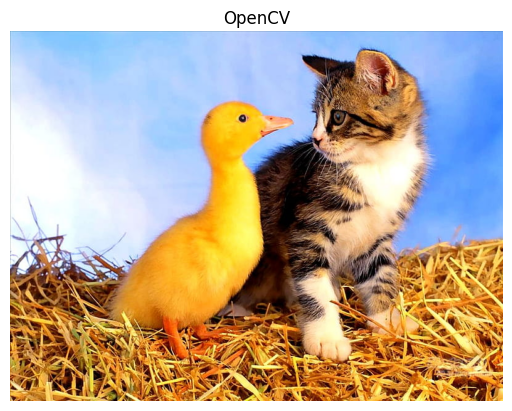

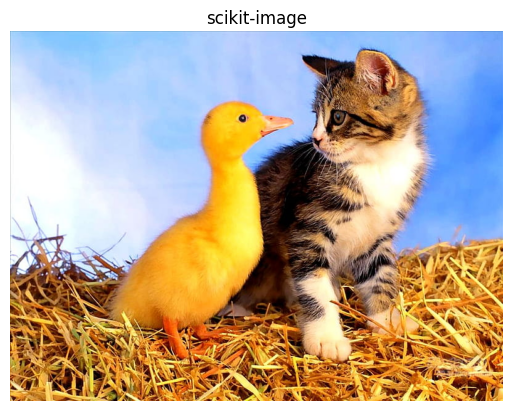

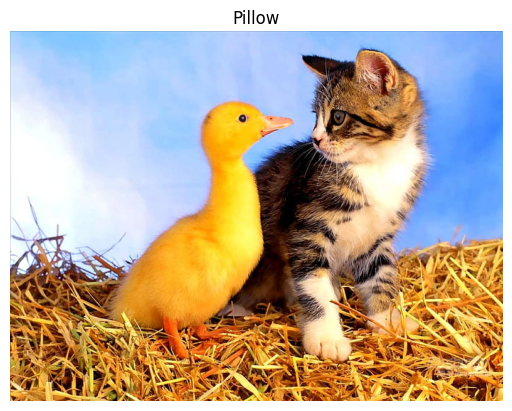

Image size (H x W): 600 x 800


In [47]:
IMG_PATH = "/content/kitty-and-ducky.jpg"

import cv2, numpy as np, matplotlib.pyplot as plt
from PIL import Image
from skimage import io as skio

img_cv  = cv2.imread(IMG_PATH, cv2.IMREAD_COLOR)   # BGR
img_sk  = skio.imread(IMG_PATH)                    # RGB
img_pil = Image.open(IMG_PATH).convert("RGB")      # PIL RGB
img_pil_np = np.array(img_pil)                     # RGB numpy

plt.figure(); plt.imshow(cv2.cvtColor(img_cv, cv2.COLOR_BGR2RGB)); plt.title("OpenCV"); plt.axis("off"); plt.show()
plt.figure(); plt.imshow(img_sk);                   plt.title("scikit-image"); plt.axis("off"); plt.show()
plt.figure(); plt.imshow(img_pil_np);               plt.title("Pillow");       plt.axis("off"); plt.show()

H, W = img_cv.shape[:2]
print("Image size (H x W):", H, "x", W)

(b) Draw rectangles with NumPy slicing only (green=duck, red=cat)

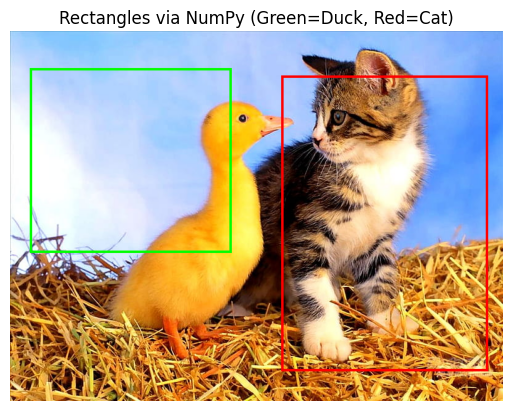

In [48]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

img_rect = img_cv.copy()
x0d, y0d, x1d, y1d = int(0.04*W), int(0.10*H), int(0.45*W), int(0.60*H)  # duck
x0c, y0c, x1c, y1c = int(0.55*W), int(0.12*H), int(0.97*W), int(0.92*H)  # cat
t = 4  # thickness

GREEN = (0, 255, 0)
RED   = (0, 0, 255)

# Duck (green)
img_rect[y0d:y0d+t, x0d:x1d] = GREEN
img_rect[y1d-t:y1d, x0d:x1d] = GREEN
img_rect[y0d:y1d, x0d:x0d+t] = GREEN
img_rect[y0d:y1d, x1d-t:x1d] = GREEN

# Cat (red)
img_rect[y0c:y0c+t, x0c:x1c] = RED
img_rect[y1c-t:y1c, x0c:x1c] = RED
img_rect[y0c:y1c, x0c:x0c+t] = RED
img_rect[y0c:y1c, x1c-t:x1c] = RED

plt.figure(); plt.imshow(cv2.cvtColor(img_rect, cv2.COLOR_BGR2RGB))
plt.title("Rectangles via NumPy (Green=Duck, Red=Cat)")
plt.axis("off"); plt.show()

(c) Crop ROIs and resize each to original image size

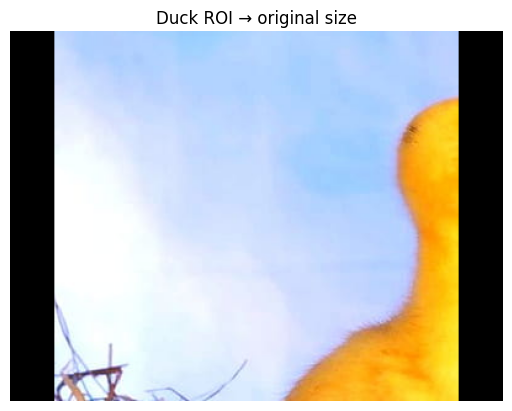

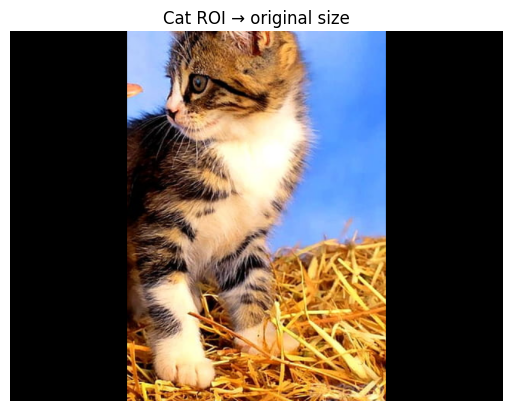

In [49]:
import numpy as np, cv2, matplotlib.pyplot as plt

duck_roi = img_cv[y0d:y1d, x0d:x1d].copy()
cat_roi  = img_cv[y0c:y1c, x0c:x1c].copy()

def resize_to_canvas(roi, W, H):
    h, w = roi.shape[:2]
    s = min(W / w, H / h)
    nw, nh = max(1, int(w*s)), max(1, int(h*s))
    resized = cv2.resize(roi, (nw, nh), interpolation=cv2.INTER_AREA)
    canvas = np.zeros((H, W, 3), dtype=np.uint8)
    y_off, x_off = (H - nh)//2, (W - nw)//2
    canvas[y_off:y_off+nh, x_off:x_off+nw] = resized
    return canvas

duck_canvas = resize_to_canvas(duck_roi, W, H)
cat_canvas  = resize_to_canvas(cat_roi,  W, H)

plt.figure(); plt.imshow(cv2.cvtColor(duck_canvas, cv2.COLOR_BGR2RGB)); plt.title("Duck ROI → original size"); plt.axis("off"); plt.show()
plt.figure(); plt.imshow(cv2.cvtColor(cat_canvas,  cv2.COLOR_BGR2RGB));  plt.title("Cat ROI → original size");  plt.axis("off"); plt.show()

(d) Masks (white foreground, black background) + bitwise AND

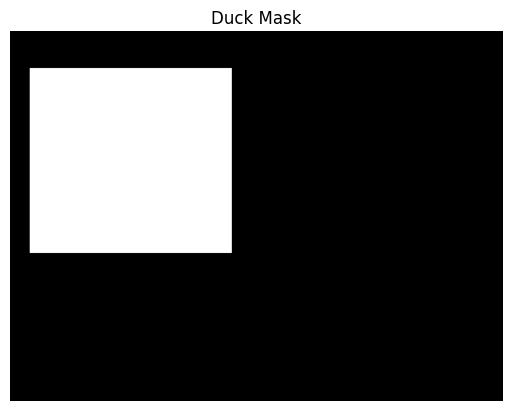

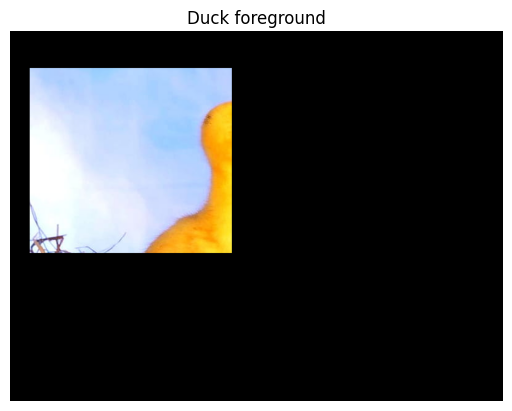

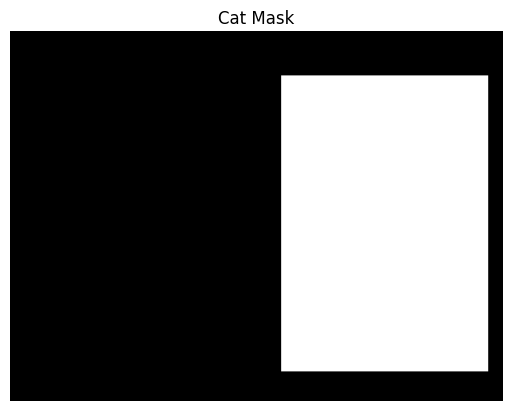

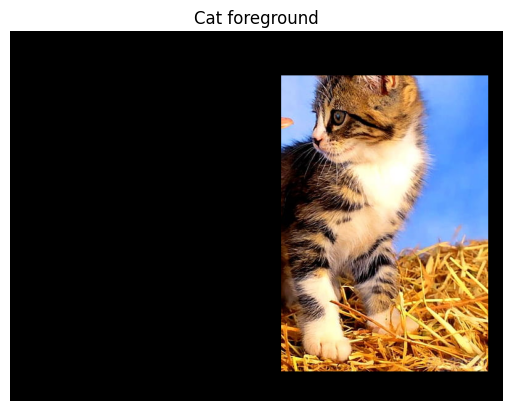

In [50]:
import numpy as np, cv2, matplotlib.pyplot as plt

# Binary masks
duck_mask = np.zeros((H, W), dtype=np.uint8); duck_mask[y0d:y1d, x0d:x1d] = 255
cat_mask  = np.zeros((H, W), dtype=np.uint8);  cat_mask[y0c:y1c, x0c:x1c]  = 255

# Only masked regions
duck_fg = cv2.bitwise_and(img_cv, img_cv, mask=duck_mask)
cat_fg  = cv2.bitwise_and(img_cv, img_cv, mask=cat_mask)

plt.figure(); plt.imshow(duck_mask, cmap="gray"); plt.title("Duck Mask"); plt.axis("off"); plt.show()
plt.figure(); plt.imshow(cv2.cvtColor(duck_fg, cv2.COLOR_BGR2RGB)); plt.title("Duck foreground"); plt.axis("off"); plt.show()

plt.figure(); plt.imshow(cat_mask, cmap="gray"); plt.title("Cat Mask"); plt.axis("off"); plt.show()
plt.figure(); plt.imshow(cv2.cvtColor(cat_fg, cv2.COLOR_BGR2RGB));  plt.title("Cat foreground");  plt.axis("off"); plt.show()

(e) Split into 5 equal segments, colored borders, histogram per segment






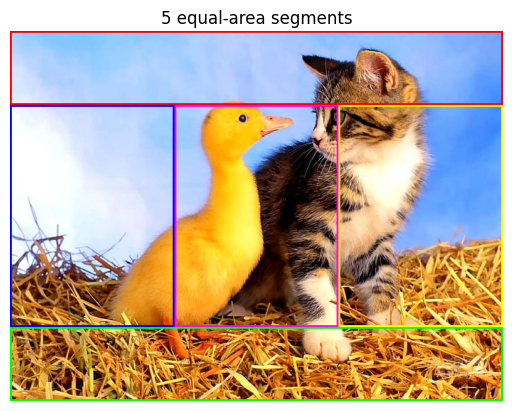

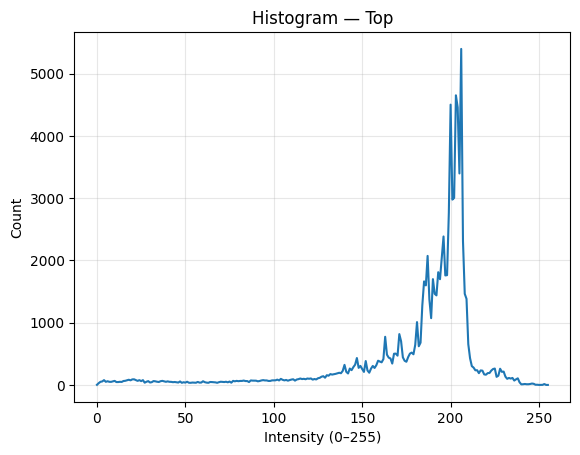

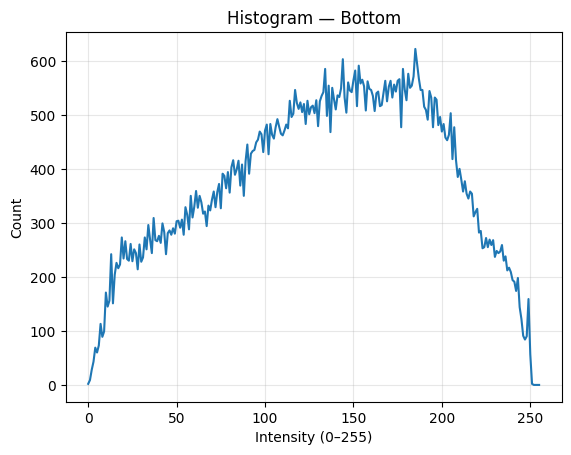

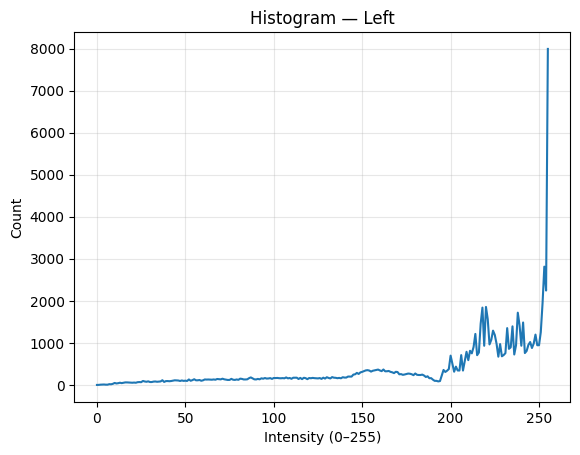

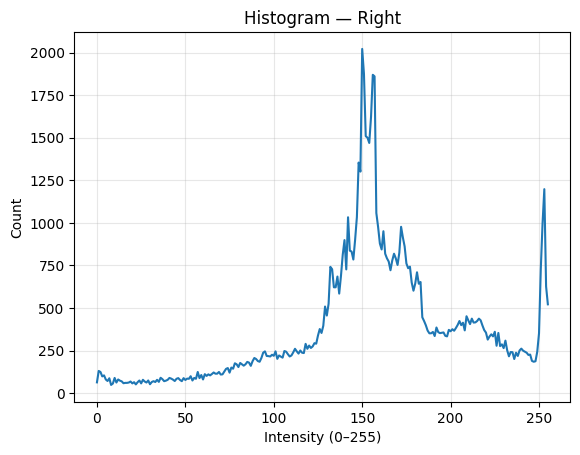

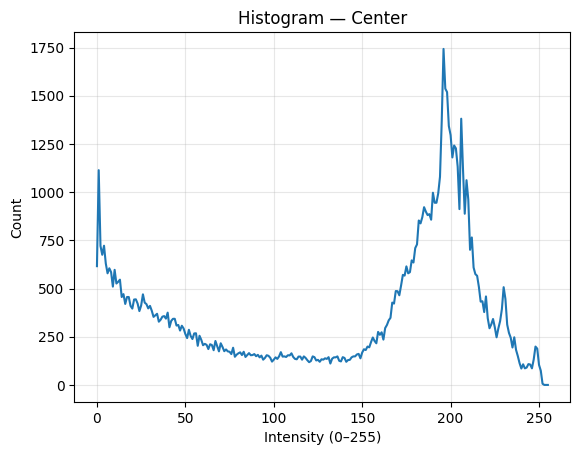

In [51]:
import cv2, numpy as np, matplotlib.pyplot as plt

A = (H * W) / 5.0
ht = int(round(H / 5.0))
ht = max(1, min(ht, H//2 - 1))
Hrem = H - 2*ht

wl = int(round(A / max(1, Hrem)))
wl = max(1, min(wl, W//2 - 1))

top    = (0,        0,        W,       ht)
bottom = (0,        H-ht,     W,       H)
left_  = (0,        ht,       wl,      H-ht)
right_ = (W-wl,     ht,       W,       H-ht)
center = (wl,       ht,       W-wl,    H-ht)

segments = [
    ("Top",    top,    (0, 0, 255)),
    ("Bottom", bottom, (0, 255, 0)),
    ("Left",   left_,  (255, 0, 0)),
    ("Right",  right_, (0, 255, 255)),
    ("Center", center, (255, 0, 255)),
]
t = 3
vis = img_cv.copy()
for _, (x0,y0,x1,y1), c in segments:
    vis[y0:y0+t, x0:x1] = c
    vis[y1-t:y1, x0:x1] = c
    vis[y0:y1, x0:x0+t] = c
    vis[y0:y1, x1-t:x1] = c

plt.figure(); plt.imshow(cv2.cvtColor(vis, cv2.COLOR_BGR2RGB))
plt.title("5 equal-area segments")
plt.axis("off"); plt.show()

# grayscale histograms
gray = cv2.cvtColor(img_cv, cv2.COLOR_BGR2GRAY)
for name, (x0,y0,x1,y1), _ in segments:
    seg = gray[y0:y1, x0:x1]
    hist = cv2.calcHist([seg],[0],None,[256],[0,256]).ravel()
    plt.figure(); plt.plot(hist)
    plt.title(f"Histogram — {name}")
    plt.xlabel("Intensity (0–255)"); plt.ylabel("Count"); plt.grid(True, alpha=0.3)
    plt.show()

**Question 02**

(a) Read RGB image

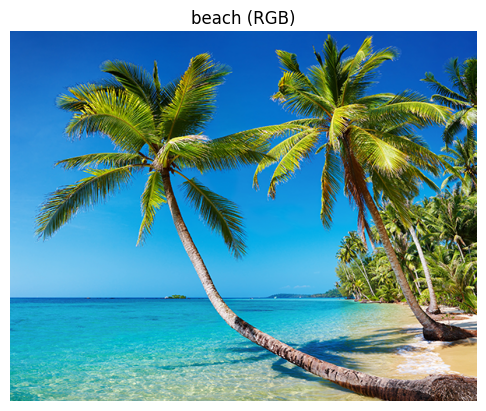

In [52]:
IMG_PATH = "/content/beach.png"

import cv2, numpy as np, matplotlib.pyplot as plt
img_bgr = cv2.imread(IMG_PATH, cv2.IMREAD_COLOR);
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

plt.figure(); plt.imshow(img_rgb); plt.title("beach (RGB)"); plt.axis("off"); plt.show()

(b) Grayscale + histogram

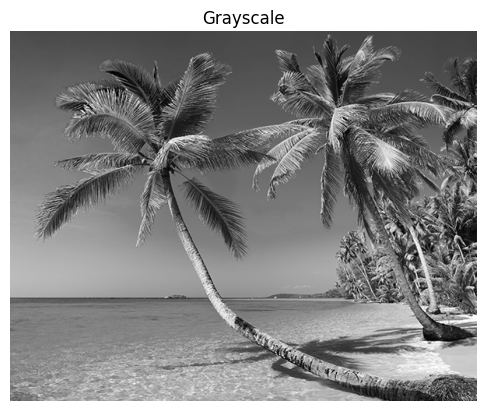

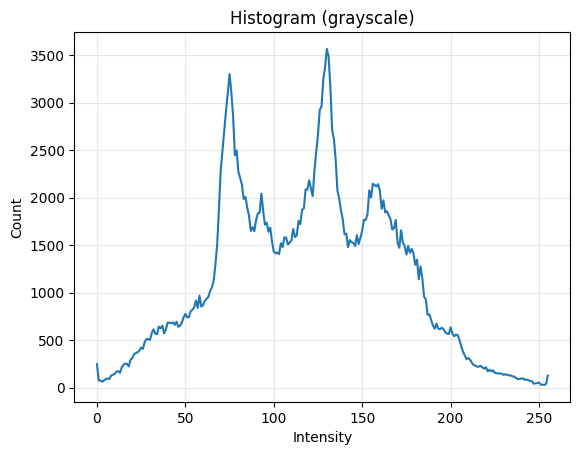

In [53]:
import cv2, matplotlib.pyplot as plt

gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)

plt.figure(); plt.imshow(gray, cmap="gray"); plt.title("Grayscale"); plt.axis("off"); plt.show()

hist = cv2.calcHist([gray], [0], None, [256], [0,256]).ravel()
plt.figure(); plt.plot(hist); plt.title("Histogram (grayscale)"); plt.xlabel("Intensity"); plt.ylabel("Count"); plt.grid(True, alpha=0.3); plt.show()

(c) Performing negative operation

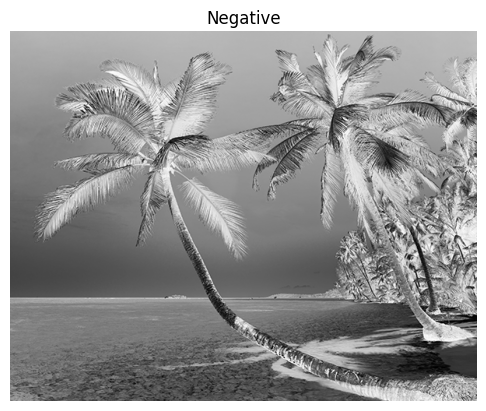

In [54]:
import numpy as np, matplotlib.pyplot as plt

neg = 255 - gray
plt.figure(); plt.imshow(neg, cmap="gray"); plt.title("Negative"); plt.axis("off"); plt.show()

(d) Log transform

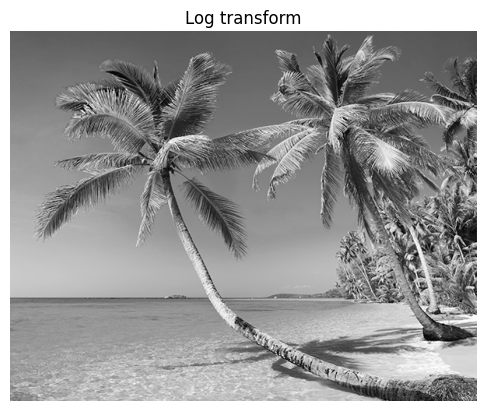

In [55]:
import numpy as np, matplotlib.pyplot as plt
r = gray.astype(np.float32) / 255.0
c = 255.0 / np.log(1.0 + 1.0)
log_img = c * np.log(1.0 + r)
log_u8 = np.clip(log_img, 0, 255).astype(np.uint8)
plt.figure(); plt.imshow(log_u8, cmap="gray"); plt.title("Log transform"); plt.axis("off"); plt.show()

(e) Contrast stretch to full range

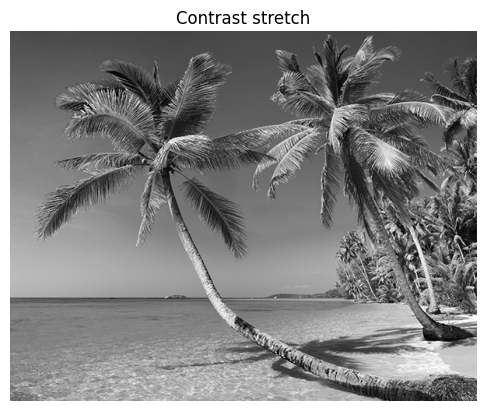

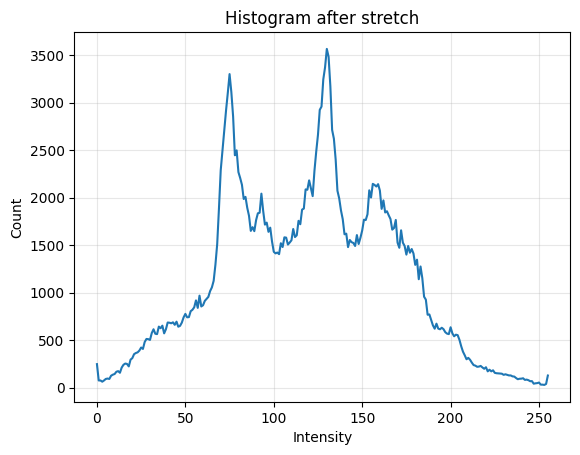

In [56]:
import numpy as np, matplotlib.pyplot as plt, cv2
rmin, rmax = int(gray.min()), int(gray.max())
if rmax == rmin:
    stretched_u8 = np.zeros_like(gray)
else:
    stretched = (gray.astype(np.float32) - rmin) * 255.0 / (rmax - rmin)
    stretched_u8 = np.clip(stretched, 0, 255).astype(np.uint8)

plt.figure(); plt.imshow(stretched_u8, cmap="gray"); plt.title("Contrast stretch"); plt.axis("off"); plt.show()
hist2 = cv2.calcHist([stretched_u8], [0], None, [256], [0,256]).ravel()
plt.figure(); plt.plot(hist2); plt.title("Histogram after stretch"); plt.xlabel("Intensity"); plt.ylabel("Count"); plt.grid(True, alpha=0.3); plt.show()

(f) Power law gamma transform:

In [57]:
import numpy as np
assert 'gray' in globals(), "Run Q2 (a)-(b) first to define `gray`."
r = gray.astype(np.float32) / 255.0

gammas = [round(g,1) for g in np.arange(0.0, 3.0 + 0.001, 0.5)]
gamma_imgs_float = {}

for g in gammas:
    s = np.power(r, g)
    s = np.clip(s, 0.0, 1.0)
    gamma_imgs_float[g] = s

print("Prepared gamma images for:", gammas)

Prepared gamma images for: [np.float64(0.0), np.float64(0.5), np.float64(1.0), np.float64(1.5), np.float64(2.0), np.float64(2.5), np.float64(3.0)]


(g) Display the outputs

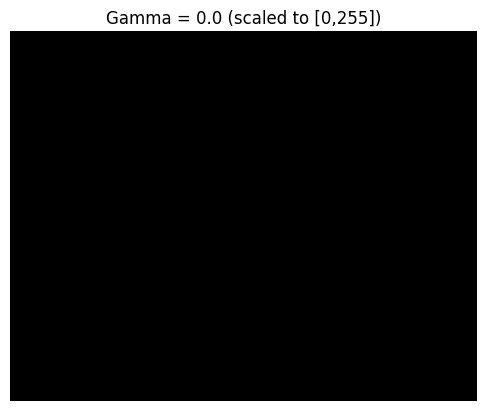

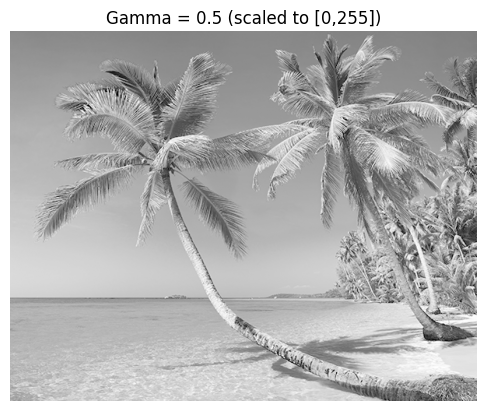

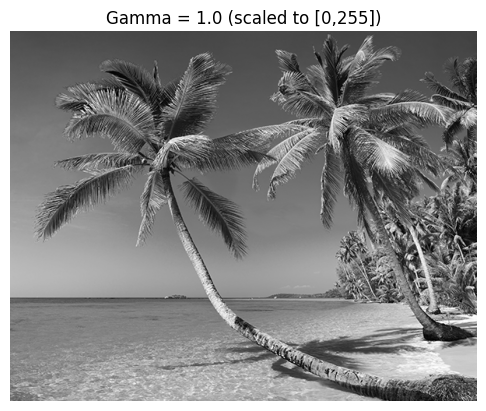

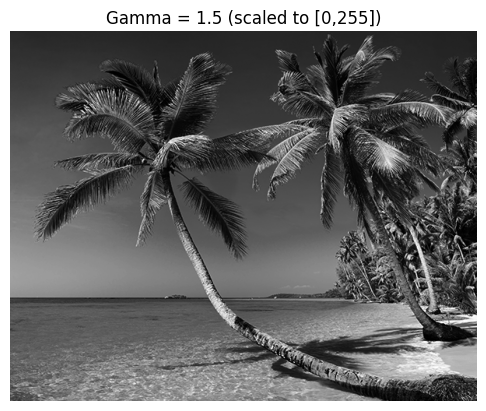

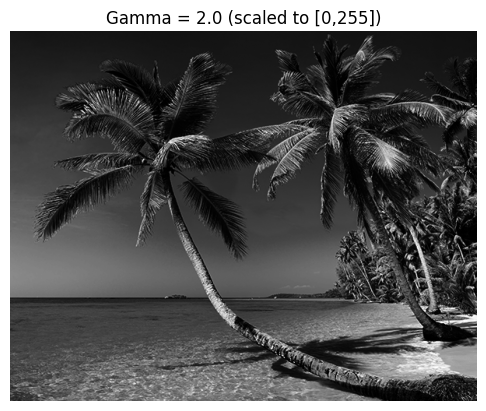

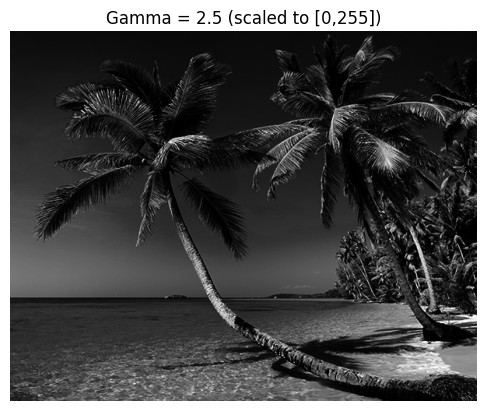

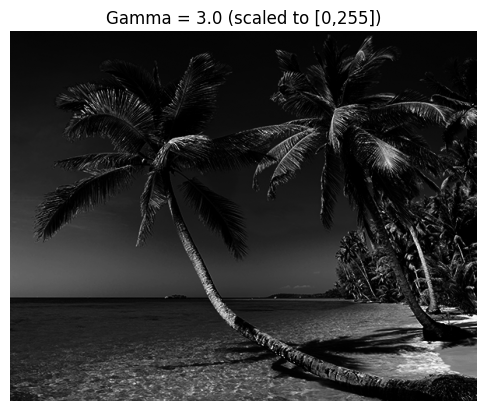

In [58]:
import matplotlib.pyplot as plt
import numpy as np
assert 'gamma_imgs_float' in globals(), "Run part (f) first."
for g, s in gamma_imgs_float.items():
    out_u8 = (s * 255.0).astype(np.uint8)
    plt.figure()
    plt.imshow(out_u8, cmap='gray')
    plt.title(f"Gamma = {g} (scaled to [0,255])")
    plt.axis('off')
    plt.show()